In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [6]:
train = pd.read_csv('training_ready.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IsBadBuy         72983 non-null  int64  
 1   Auction          72983 non-null  int64  
 2   VehicleAge       72983 non-null  int64  
 3   WheelType        72983 non-null  object 
 4   VehOdo           72983 non-null  int64  
 5   Nationality      72983 non-null  object 
 6   VehBCost         72983 non-null  float64
 7   WarrantyCost     72983 non-null  int64  
 8   OutCost          72983 non-null  int64  
 9   VehOdo_Standard  72983 non-null  float64
 10  AverageMMR       72983 non-null  float64
 11  Make_new         72983 non-null  object 
 12  VNST_new         72983 non-null  object 
 13  Size_class       72983 non-null  int64  
 14  Model_Name       72983 non-null  object 
 15  Model_Property   72983 non-null  object 
 16  SubModel_New     72983 non-null  object 
 17  Trim_New    

# K-Means

In [11]:
train2 = train

In [12]:
X = train2[["VehicleAge", "VehOdo", "VehBCost", "WarrantyCost", "AverageMMR", "Size_class"]].values

In [13]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [14]:
X

array([[0.25      , 0.75948671, 0.15613178, 0.09252416, 0.28440011,
        0.11111111],
       [0.5       , 0.80049057, 0.16712853, 0.08399659, 0.25469668,
        1.        ],
       [0.375     , 0.62206471, 0.10774611, 0.13175099, 0.15372872,
        0.11111111],
       ...,
       [0.375     , 0.754563  , 0.18032462, 0.2033826 , 0.25984905,
        0.66666667],
       [0.25      , 0.67388991, 0.15393244, 0.21489483, 0.19852733,
        0.22222222],
       [0.25      , 0.55937308, 0.17592593, 0.1209494 , 0.22976397,
        0.11111111]])

In [17]:
sse_list = list()
max_k = 35
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    sse = kmeans.inertia_
    sse_list.append(sse)

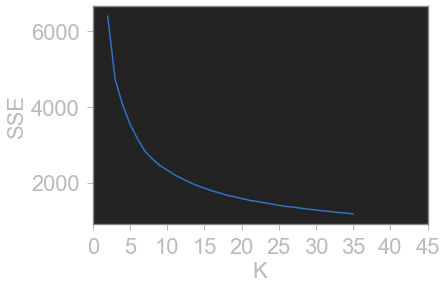

In [18]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [19]:
dec_list=[]
k_list=[]
for i in range(1, len(sse_list)):
    k = i+2
    gain = sse_list[i]/sse_list[i-1]-1
    dec=(k, gain)
    dec_list.append(dec)
    if (dec_list[i-2][1]/gain)>1.2:
        k_list.append(dec_list[i-2])
    else:
        continue

print(k_list)

[(3, -0.26129197336658505), (7, -0.1044821024080973), (9, -0.06687319227696109), (11, -0.0545837183065615), (14, -0.04327073999819442), (16, -0.03927890273644008), (18, -0.038023281853342694), (21, -0.028233655983437744), (26, -0.02283531868141664), (33, -0.01885613652971385)]


In [20]:
kmeans = KMeans(n_clusters = 7, n_init=10, max_iter = 100, random_state = 1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [21]:
kmeans.cluster_centers_

array([[0.72347565, 0.65842476, 0.10820666, 0.14592628, 0.12786254,
        0.11476132],
       [0.29311726, 0.62580746, 0.16668155, 0.14692905, 0.26073666,
        0.55379949],
       [0.49595954, 0.65366017, 0.18888094, 0.08895777, 0.25601258,
        0.95541993],
       [0.16174874, 0.42101384, 0.15220829, 0.05016953, 0.22305823,
        0.10513771],
       [0.62461289, 0.65457432, 0.1559085 , 0.17833471, 0.19408504,
        0.60581641],
       [0.22929585, 0.65029342, 0.16282884, 0.1385618 , 0.25728419,
        0.18314863],
       [0.43450146, 0.60032368, 0.1263294 , 0.08150108, 0.16990809,
        0.10221772]])

In [22]:
scaler.inverse_transform(kmeans.cluster_centers_)

array([[6.78780519e+00, 7.78390380e+04, 4.92094056e+03, 1.48873731e+03,
        4.85778554e+03, 1.03285185e+00],
       [3.34493811e+00, 7.42220409e+04, 7.57967669e+03, 1.49579277e+03,
        9.90597232e+03, 4.98419540e+00],
       [4.96767631e+00, 7.73106835e+04, 8.58903849e+03, 1.08790687e+03,
        9.72649401e+03, 8.59877939e+00],
       [2.29398993e+00, 5.15120664e+04, 6.92160661e+03, 8.14992791e+02,
        8.47448393e+03, 9.46239361e-01],
       [5.99690310e+00, 7.74120549e+04, 7.08984770e+03, 1.71676304e+03,
        7.37372725e+03, 5.45234765e+00],
       [2.83436683e+00, 7.69373381e+04, 7.40450161e+03, 1.43692081e+03,
        9.77480525e+03, 1.64833769e+00],
       [4.47601168e+00, 7.13960930e+04, 5.74494505e+03, 1.03544162e+03,
        6.45519072e+03, 9.19959473e-01]])

In [23]:
labels, sizes = np.unique(kmeans.labels_, return_counts=True)
for l, s in zip(labels, sizes):
    print('Cluster %d: %s (%.2f)' % (l, s, s/len(X)))

Cluster 0: 7847 (0.11)
Cluster 1: 9048 (0.12)
Cluster 2: 4424 (0.06)
Cluster 3: 11528 (0.16)
Cluster 4: 10011 (0.14)
Cluster 5: 13366 (0.18)
Cluster 6: 16759 (0.23)


In [24]:
train["label"] = kmeans.labels_
train.groupby("label").mean()

,IsBadBuy,Auction,VehicleAge,VehOdo,VehBCost,WarrantyCost,OutCost,VehOdo_Standard,AverageMMR,Size_class
label,,,,,,,,,,
0,0.227348,0.804894,6.785651,77751.802727,4922.744106,1486.953740,0.978081,0.039813,4858.143972,1.032242
1,0.092396,0.801835,3.344938,74222.040893,7579.676685,1495.792772,1.003647,0.304108,9905.972318,4.984195
2,0.123644,0.773056,4.967676,77310.683544,8589.038486,1087.906872,1.027803,0.249990,9726.494008,8.598779
3,0.069570,0.841516,2.297103,51502.998439,6920.169025,814.768217,1.001388,-0.973511,8470.612633,0.945871
4,0.177205,0.785436,5.996903,77409.942363,7090.498502,1716.675157,0.999301,0.100840,7374.296374,5.452103
5,0.074892,0.816774,2.832186,76922.250262,7406.412464,1436.907826,1.000898,0.601442,9780.040943,1.649259
6,0.133182,0.779999,4.473179,71469.778626,5745.175010,1036.443583,0.998568,-0.119082,6457.479612,0.920282
